In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
# import spm1d
from hotelling.plots import control_chart, univariate_control_chart

### 5.18
**Sử dụng dữ liệu *College Test* cho ở bảng 5.2 (Ví dụ 5.5)**

In [2]:
path_18 = 'T5-2.txt'
data_18 = pd.read_table(path_18, delim_whitespace=True)
n_18, p_18 = data_18.shape
data_18

,x1,x2,x3
0,468,41,26
1,428,39,26
2,514,53,21
3,547,67,33
4,614,61,27
...,...,...,...
82,614,70,23
83,527,49,30
84,474,41,16
85,441,47,26


**(a) Xét kiểm định giả thuyết $H_0: \boldsymbol\mu = [500, 50, 30]^T$ và đối thuyết $H_1: \boldsymbol\mu \neq [500, 50, 30]^T$ với mức ý nghĩa $\alpha = 0.05$. Giả sử rằng $[500, 50, 30]^T$ là điểm trung bình của hàng nghìn sinh viên trong 10 năm qua. Có thể tin rằng nhóm các sinh viên ở bảng 5.2 được cho điểm khác nhau không? Giải thích.** 

Giả sử giả thuyết $H_0: \boldsymbol\mu = \boldsymbol\mu_0 = [500, 50, 30]^T$ đúng, ta tiến hành kiểm định giả thuyết thông qua thống kê

<center> $T^2 = n(\overline{\textbf{X}}-\boldsymbol\mu_0)^T\textbf{S}^{-1}(\overline{\textbf{X}}-\boldsymbol\mu_0)$ <center>

In [3]:
mu0 = np.array([500, 50, 30])

# Tính mean và covariance từ dữ liệu
x_mean = data_18.mean()
S = np.cov(data_18.T)

# Tính giá trị thống kê T^2
T2 = n_18*np.dot(np.dot(np.transpose(x_mean - mu0), np.linalg.inv(S)), x_mean - mu0)
T2

223.3101756848916

Với mức ý nghĩa $\alpha=0.05$ ta có giá trị
<center> $\dfrac{(n-1)p}{n-p}F_{p,n-p}(\alpha)$ <center>

In [4]:
alpha = 0.05

f = stats.f.ppf(q=1-alpha, dfn=p_18, dfd=n_18-p_18)
F = (n_18-1)*p_18/(n_18-p_18)*f

print(F)

8.3334833261061


Do $T^2 > \dfrac{(n-1)p}{n-p}F_{p,n-p}(\alpha)$ nên ta bác bỏ giả thuyết $H_0$ với mức ý nghĩa $\alpha = 0.05$. Như vậy, điểm số của nhóm học sinh cho ở bảng 5.2 đạt được là khác nhau.

**(b) Xác định độ dài và hướng của các trục của confidence ellipsoid 95% cho $\boldsymbol\mu$**

Các trục của confidence ellipsoid sẽ nằm dọc theo phương của các vectơ riêng của ma trận **S**.

In [5]:
# Trị riêng và vectơ riêng của ma trận S
eigvals, eigvecs = np.linalg.eigh(S)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]
print(eigvecs)

[[-0.99390539 -0.10373153 -0.0373074 ]
 [-0.10344339  0.99458923 -0.00957782]
 [-0.03809906  0.00566024  0.99925794]]


Chiều dài các trục của confidence ellipsoid được cho bởi
<center> $2\sqrt{\lambda_i}\sqrt{\dfrac{p(n-1)}{n(n-p)}F_{p,n-p}(\alpha)}$ với $i=1,2,3$<center>

In [6]:
nstd = np.sqrt(F/n_18)
# Chiều dài các trục của confidence ellipspoid
lengths = 2 * nstd * np.sqrt(eigvals)
print(lengths)

[47.4599951   4.94553665  2.36500022]


**(c) Vẽ biểu đồ Q-Q từ phân phối biên của điểm số của các bài kiểm tra *social science and history* ($X_1$), *verbal* ($X_2$) và *science* ($X_3$). Ngoài ra, vẽ 3 biểu đồ phân tán (scatter diagram) từ các cặp quan trắc trên các biến khác nhau. Dữ liệu này có tuân theo phân phối chuẩn không?**

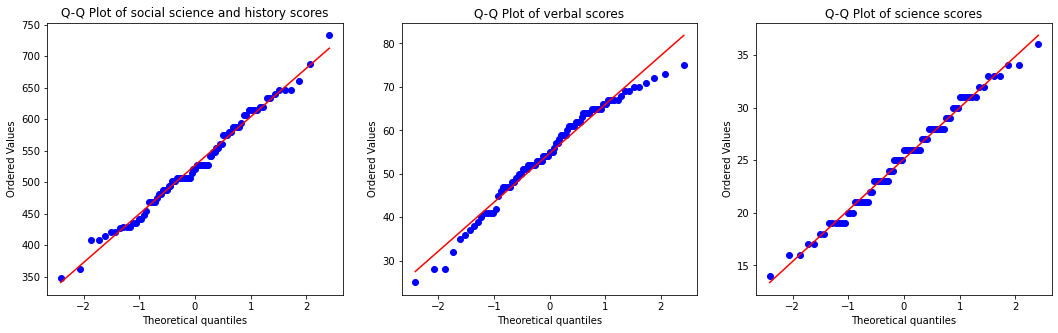

In [7]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

prob_1 = stats.probplot(data_18['x1'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot of social science and history scores')

prob_2 = stats.probplot(data_18['x2'], dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot of verbal scores')

prob_3 = stats.probplot(data_18['x3'], dist=stats.norm, plot=axs[2])
axs[2].set_title('Q-Q Plot of science scores')

plt.show()

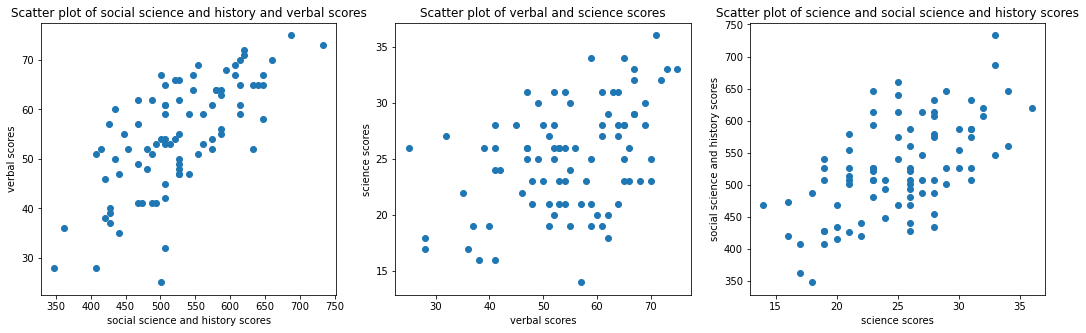

In [8]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

axs[0].scatter(data_18['x1'], data_18['x2'])
axs[0].set(xlabel='social science and history scores', ylabel='verbal scores')
axs[0].set_title('Scatter plot of social science and history and verbal scores')

axs[1].scatter(data_18['x2'], data_18['x3'])
axs[1].set(xlabel='verbal scores', ylabel='science scores')
axs[1].set_title('Scatter plot of verbal and science scores')

axs[2].scatter(data_18['x3'], data_18['x1'])
axs[2].set(xlabel='science scores', ylabel='social science and history scores')
axs[2].set_title('Scatter plot of science and social science and history scores')

plt.show()

* Từ các Q-Q plot ở trên ta thấy rằng ứng với mỗi đặc trưng thì các điểm có xu hướng nằm trên một đường thẳng.
* Từ các biểu đồ phân tán, ta thấy được ứng với mỗi đặc trưng thì các điểm dữ liệu có xu hướng phân bố đều và có tính đối xứng.

Từ hai điều trên cho ta thấy được dữ liệu đề bài có vẻ có phân phối chuẩn. Do mẫu chưa đủ lớn và cơ sở từ các biểu đồ trên chưa đủ mạnh để bác bỏ giả thuyết bộ dữ liệu có phân phối chuẩn.

### 5.19
**Các phép đo của $x_1$ = độ cứng (stiffness) và $x_2$ = lực bẻ cong (bending strength) cho mẫu gồm $n=30$ tấm gỗ được cho ở bảng 5.11. Đơn vị là `pounds/(inches)^2`.**

In [9]:
path_19 = 'T5-11.txt'
data_19 = pd.read_table(path_19, delim_whitespace=True)
n_19, p_19 = data_19.shape
print(data_19.head())
print(">> Shape of data: ",data_19.shape)

     x1     x2
0  1232   4175
1  1115   6652
2  2205   7612
3  1897  10914
4  1932  10850
>> Shape of data:  (30, 2)


**(a) Xây dựng và vẽ hình confidence ellipse 95% cho cặp $[\mu_1, \mu_2]^T$, trong đó $\mu_1 = E(X_1)$ và  $\mu_2=E(X_2)$.**

Từ dữ liệu, ta tính được các giá trị trung bình mẫu $\overline{\textbf{x}}$ và ma trận hiệp phương sai mẫu $\textbf{S}$.

Với độ tin cậy 95%, ta có giá trị
<center> $\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)$ <center>
    
Từ đây, ta xây dựng được miền tin cậy 95% cho $\boldsymbol\mu = [\mu_1,\mu_2]^T$ là hình ellipse thoả
<center> $n(\overline{\textbf{x}}-\boldsymbol\mu)^T\textbf{S}^{-1}(\overline{\textbf{x}}-\boldsymbol\mu) \leq \dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)$ <center>

In [10]:
# Tính mean và covariance từ dữ liệu
x_mean = data_19.mean()
S = np.cov(data_19.T)
print(">> Vectơ trung bình mẫu: \n", np.array(x_mean))
print("\n>> Ma trận hiệp phương sai mẫu: \n", S)

alpha = 0.05
f = stats.f.ppf(q=1-alpha, dfn=p_19, dfd=n_19-p_19)
F = (p_19*(n_19-1)/(n_19-p_19))*f

>> Vectơ trung bình mẫu: 
 [1860.5        8354.13333333]

>> Ma trận hiệp phương sai mẫu: 
 [[ 124054.67241379  361620.44827586]
 [ 361620.44827586 3486333.15402299]]


Các trục của hình confidence ellipse sẽ nằm dọc theo phương của các vectơ riêng của ma trận **S** và chiều dài các trục được cho bởi
<center> $2\sqrt{\lambda_i}\sqrt{\dfrac{p(n-1)}{n(n-p)}F_{p,n-p}(\alpha)}$ với $i=1,2,3$<center>

In [11]:
# Trị riêng và vectơ riêng của ma trận S
eigvals, eigvecs = np.linalg.eigh(S)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]
print(">> Các trị riêng của ma trận hiệp phương sai mẫu: \n", eigvals)
print("\n>> Các vectơ riêng của ma trận hiệp phương sai mẫu: \n", eigvecs)

nstd = np.sqrt(F/n_19)
# Chiều dài các trục của confidence ellipspoid
lengths = 2 * nstd * np.sqrt(eigvals)
print("\n>> Độ dài các trục của hình confidence ellipse: \n", lengths)

>> Các trị riêng của ma trận hiệp phương sai mẫu: 
 [3524786.45088081   85601.37555597]

>> Các vectơ riêng của ma trận hiệp phương sai mẫu: 
 [[ 0.10573993 -0.99439382]
 [ 0.99439382  0.10573993]]

>> Độ dài các trục của hình confidence ellipse: 
 [1803.30444551  281.02374686]


Từ đây, ta vẽ được hình confidence ellipse 95% cho vectơ trung bình tổng thể $\boldsymbol\mu$ như sau

In [12]:
from matplotlib.patches import Ellipse

def get_cov_ellipse(cov, centre, nstd, eig = False, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    if eig:
        return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs), eigvals, eigvecs
    else: 
        return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

Text(0.5, 1.0, '95% confidence ellipse for the pair $[ \\mu_1, \\mu_2]^T$')

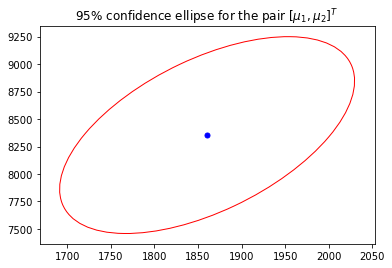

In [13]:
fig, ax = plt.subplots()

e = get_cov_ellipse(S, x_mean, np.sqrt(F/n_19), edgecolor='red', facecolor='None')
ax.scatter(x_mean[0], x_mean[1], c='blue', s=25)
ax.add_patch(e)
ax.set_title("95% confidence ellipse for the pair $[ \mu_1, \mu_2]^T$")

**(b) Giả sử $\boldsymbol\mu_0=[2000, 10000]^T$ là các giá trị *đặc trưng* cho stiffness và bending strength. Với kết quả ở câu (a), dữ liệu trong bảng 5.11 có phù hợp với các giá trị trên không?**

Xét kiểm định giả thuyết $H_0: \boldsymbol\mu = \boldsymbol\mu_0=[2000, 10000]^T$ và đối thuyết $H_1: \boldsymbol\mu \neq \boldsymbol\mu_0$. Từ câu (a) ta có miền tin cậy 95% cho vectơ trung bình tỗng thể $\boldsymbol\mu$ và điểm $\boldsymbol\mu_0$ được biểu diễn ở hình bên dưới

Text(0.5, 1.0, '95% confidence ellipse for the pair $[ \\mu_1, \\mu_2]^T$')

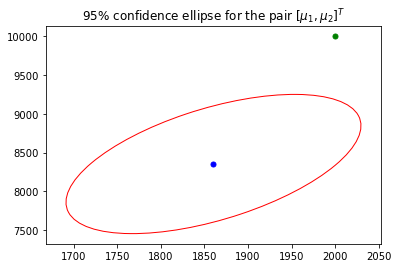

In [14]:
mu0 = np.array([2000, 10000])

fig, ax = plt.subplots()

e = get_cov_ellipse(S, x_mean, np.sqrt(F/n_19), edgecolor='red', facecolor='None')
ax.scatter(x_mean[0], x_mean[1], c='blue', s=25)
ax.scatter(mu0[0], mu0[1], c='green', s=25)
ax.add_patch(e)
ax.set_title("95% confidence ellipse for the pair $[ \mu_1, \mu_2]^T$")

Do điểm $\boldsymbol\mu_0=[2000,10000]^T$ không nằm trong hình confidence ellipse nên với độ tin cậy 95% ta bác bỏ giả thuyết $H_0$. Do đó với độ tin cậy 95%, dữ liệu được phân tích không phù hợp với các giá trị $[2000, 10000]^T$.

**(c) Phân phối chuẩn hai chiều có phải là một mô hình tổng thể khả thi không? Giải thích với biểu đồ Q-Q và biểu đồ phân tán.**

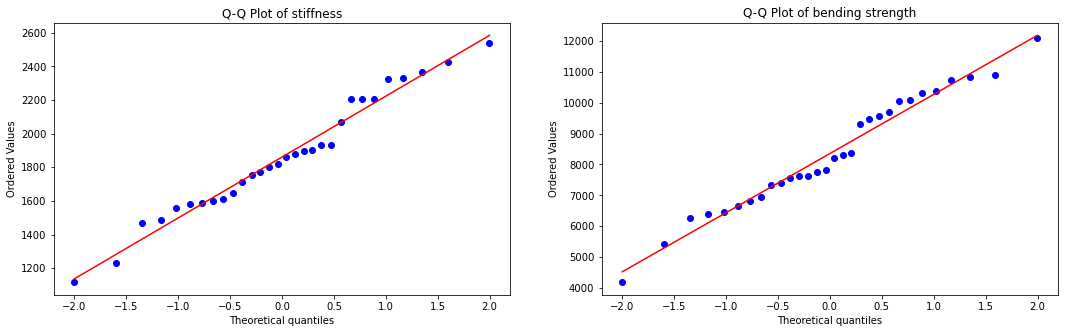

In [15]:
fig, axs = plt.subplots(1,2, figsize=(18,5))

prob_1 = stats.probplot(data_19['x1'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot of stiffness')

prob_2 = stats.probplot(data_19['x2'], dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot of bending strength')

plt.show()

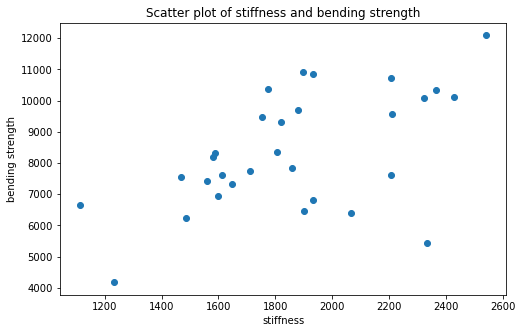

In [16]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(data_19['x1'], data_19['x2'])
ax.set(xlabel='stiffness', ylabel='bending strength')
ax.set_title('Scatter plot of stiffness and bending strength')

plt.show()

Biểu đồ Q-Q ở cả *stiffness* và *bending strength* cho thấy rằng  các điểm dữ liệu có xu hướng nằm trên một đường tuyến tính và biểu đồ phân tán cũng không chỉ ra được sự sai lệch của phân phối chuẩn 2 chiều. Do đó ta không đủ cơ sở để bác bỏ giả thuyết dữ liệu trên tuân theo phân phối chuẩn 2 chiều.

### 5.20
**Sử dụng bộ data bảng 5.12 về chim. Một nhà sinh vật học hoang dã đo $x_1$ là độ dài đuôi (theo milimét) và $x_2$ là độ dài cánh (theo milimet) cho một mẫu có kích cỡ 45.**

In [17]:
print('Exercise 5.20: ')
print('a)')
path_512 = 'T5-12.txt'
data_512 = pd.read_table(path_512, delim_whitespace=True,header=None)
data_512.columns=['x_1(tail length)','x_2(wing length)']
print(data_512.head(10))
n_512,p_512=data_512.shape
print(data_512.shape)

Exercise 5.20: 
a)
   x_1(tail length)  x_2(wing length)
0               191               284
1               197               285
2               208               288
3               180               273
4               180               275
5               188               280
6               210               283
7               196               288
8               191               271
9               179               257
(45, 2)


**a) Vẽ miền ellipse tin cậy 95% cho trung bình tổng thể $\mu_1, \mu_2$. Giả sử biết $\mu_1=190mm, \mu_2=275mm$, đây có phải là những giá trị khả thi cho độ dài trung bình đuôi và cánh cho một con chim cái không ?**

In [18]:
x_mean = data_512.mean(axis=0)
S = np.cov(data_512.T)
print(">> Vectơ trung bình mẫu: \n", np.array(x_mean))
print("\n>> Ma trận hiệp phương sai mẫu: \n", S)

alpha = 0.05
f_512 = stats.f.ppf(q=1-alpha, dfn=p_512, dfd=n_512-p_512)
F_512 = (p_512*(n_512-1)/(n_512-p_512))*f_512
print('\n>> Giá trị tới hạn là: \n',F_512)

>> Vectơ trung bình mẫu: 
 [193.62222222 279.77777778]

>> Ma trận hiệp phương sai mẫu: 
 [[120.69494949 122.3459596 ]
 [122.3459596  208.54040404]]

>> Giá trị tới hạn là: 
 6.5784713686908765


In [19]:
# Trị riêng và vectơ riêng của ma trận S
eigvals, eigvecs = np.linalg.eigh(S)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]
print(">> Các trị riêng của ma trận hiệp phương sai mẫu: \n", eigvals)
print("\n>> Các vectơ riêng của ma trận hiệp phương sai mẫu: \n", eigvecs)

nstd = np.sqrt(F_512/n_512)
# Chiều dài các trục của confidence ellipspoid
lengths = 2 * nstd * np.sqrt(eigvals)
print("\n>> Độ dài các trục của hình confidence ellipse: \n", lengths)

>> Các trị riêng của ma trận hiệp phương sai mẫu: 
 [294.6089834   34.62637013]

>> Các vectơ riêng của ma trận hiệp phương sai mẫu: 
 [[ 0.57537391 -0.8178905 ]
 [ 0.8178905   0.57537391]]

>> Độ dài các trục của hình confidence ellipse: 
 [13.12529961  4.49976379]


Text(0.5, 1.0, '\n Miền tin cậy hình ellip 95% cho trung bình tổng thể $ \\mu_1, \\mu_2 $ là:')

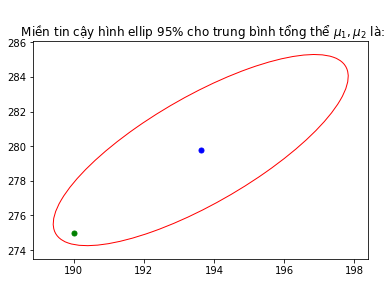

In [20]:
fig, ax = plt.subplots()
e = get_cov_ellipse(S, x_mean, np.sqrt(F_512/n_512), edgecolor='red', facecolor='None')
ax.scatter(x_mean[0], x_mean[1], c='blue', s=25)
ax.scatter(190, 275, c='green', s=25)
ax.add_patch(e)
ax.set_title("\n Miền tin cậy hình ellip 95% cho trung bình tổng thể $ \mu_1, \mu_2 $ là:")

Điểm $(190,275)$ nằm trong hình ellipse nên ta kết luận đây là giá trị khả thi cho trung bình độ dài đuôi và độ dài cánh cho những con chim cái.

**b) Xây dựng khoảng $T^2$ đồng thời 95% cho $\mu_1, \mu_2$ và khoảng Bonferroni 95% cho $\mu_1,\mu_2$. So sánh hai khoảng này. Nêu sự thuận lợi mà khoảng $T^2$ có so với khoảng Bonferroni.**

Với độ tin cậy 95%, ta có giá trị
<center> $\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)$ <center>
    
Từ đây, ta xây dựng được khoảng tin cậy 95% cho từng giá trị $\mu_1,\mu_2$ như sau
    
<center> $\overline{x}_1-\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{11}}{n}}\leq\mu_1\leq\overline{x}_1+\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{11}}{n}}$ <center>

<center> $\overline{x}_2-\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{22}}{n}}\leq\mu_2\leq\overline{x}_2+\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{22}}{n}}$ <center>

In [21]:
lcb = lambda i: x_mean[i] - np.sqrt(F_512)*np.sqrt(S[i][i]/n_512)
ucb = lambda i: x_mean[i] + np.sqrt(F_512)*np.sqrt(S[i][i]/n_512)

print("\n>> Khoảng T^2 95% cho trung bình: \n")
IC = []
for i in range(p_512):
    ic = [lcb(i), ucb(i)]
    print(">> {}:\t{}\n".format(data_512.columns[i], ic))
    IC.append(ic)


>> Khoảng T^2 95% cho trung bình: 

>> x_1(tail length):	[189.42172418403118, 197.8227202604133]

>> x_2(wing length):	[274.25635067321497, 285.2992048823406]



Với độ tin cậy 95%, ta xây dựng được khoảng tin cậy Bonferroni 95% cho từng giá trị $\mu_1, \mu_2$ như sau
    
<center> $\overline{x}_1-t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{11}}{n}}\leq\mu_1\leq\overline{x}_1+t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{11}}{n}}$ <center>
    
<center> $\overline{x}_2-t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{22}}{n}}\leq\mu_2\leq\overline{x}_2+t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{22}}{n}}$ <center>

In [22]:
t_512 = stats.t.ppf(1-(alpha/(2*p_512)), n_512-1)

lcb_bonfer = lambda i: x_mean[i] - t_512*np.sqrt(S[i][i]/n_512)
ucb_bonfer = lambda i: x_mean[i] + t_512*np.sqrt(S[i][i]/n_512)

print("Khoảng tin cậy 95% Bonferroni: \n")

IC_bonfer = []
for i in range(p_512):
    ic = [lcb_bonfer(i), ucb_bonfer(i)]
    print(">> {}:\t{}\n".format(data_512.columns[i], ic))
    IC_bonfer.append(ic)

Khoảng tin cậy 95% Bonferroni: 

>> x_1(tail length):	[189.82155966089658, 197.4228847835479]

>> x_2(wing length):	[274.7819222647878, 284.77363329076775]



Ta nhận thấy khoảng $T^2$ rộng hơn khoảng Bonferroni với cùng độ tin cậy. Do đó, khoảng $T^2$ sẽ nhận được nhiều giá trị cho trung bình đồng thời hơn khoảng Bonferroni.

**c) Mô hình tổng thể có tuân theo phân phối chuẩn 2 chiều không ? Giải thích với Q-Q plots và đồ thị phân tán**

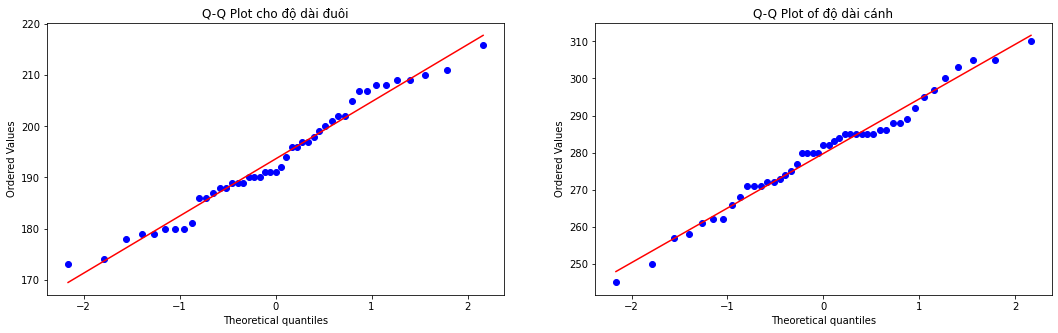

In [23]:
fig, axs = plt.subplots(1,2, figsize=(18,5))

qq_1 = stats.probplot(data_512['x_1(tail length)'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot cho độ dài đuôi')

qq_2 = stats.probplot(data_512['x_2(wing length)'], dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot of độ dài cánh')

plt.show()

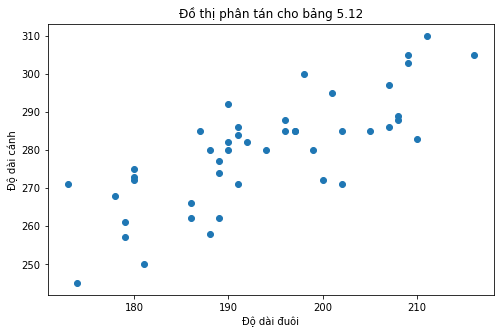

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(data_512['x_1(tail length)'], data_512['x_2(wing length)'])
ax.set(xlabel='Độ dài đuôi', ylabel='Độ dài cánh')
ax.set_title('Đồ thị phân tán cho bảng 5.12')
plt.show()

Từ cả 2 đồ thị, ta không có đủ dữ kiện để bác bỏ tính chuẩn 2 chiều. Vì các điểm của từng $x_1, x_2$ ở đồ trị Q-Q plot có xu hướng fit theo đường tuyến tính và đồ thị phân tán cũng không chỉ ra tính sai lệch với phân phối chuẩn 2 chiều.

### 5.21
**Sử dụng dữ liệu hàm lượng khoáng chất của xương cho ở bảng 1.8, xây dựng khoảng tin cậy Bonferroni 95% cho từng giá trị trung bình. Ngoài ra, tìm khoảng tin cậy $T^2$ đồng thời 95%. So sánh hai kết quả trên.**

In [25]:
path_21 = 'T1-8.txt'
data_21 = pd.read_table(path_21, delim_whitespace=True)
n_21, p_21 = data_21.shape
print(data_21.head())
print(">> Shape of data: ",data_21.shape)

   Dominant_radius  Radius  Dominant_humerus  Humerus  Dominant_ulna   Ulna
0            1.103   1.052             2.139    2.238          0.873  0.872
1            0.842   0.859             1.873    1.741          0.590  0.744
2            0.925   0.873             1.887    1.809          0.767  0.713
3            0.857   0.744             1.739    1.547          0.706  0.674
4            0.795   0.809             1.734    1.715          0.549  0.654
>> Shape of data:  (25, 6)


Từ dữ liệu, ta tính được các giá trị trung bình mẫu $\overline{\textbf{x}}$ và ma trận hiệp phương sai mẫu $\textbf{S}$.

Với độ tin cậy 95%, ta có giá trị
<center> $\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)$ <center>
    
Từ đây, ta xây dựng được khoảng tin cậy 95% cho từng giá trị $\mu_i,i=1,2,...,6$ như sau
    
<center> $\overline{x}_i-\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{ii}}{n}}\leq\mu_i\leq\overline{x}_i+\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{ii}}{n}}$ <center>
    
với $i=1,2,...,6$.

In [26]:
# Tính mean và covariance từ dữ liệu
x_mean = data_21.mean()
S = np.cov(data_21.T)

alpha = 0.05
f = stats.f.ppf(q=1-alpha, dfn=p_21, dfd=n_21-p_21)
F = (p_21*(n_21-1)/(n_21-p_21))*f

In [27]:
lcb = lambda i: x_mean[i] - np.sqrt(F)*np.sqrt(S[i][i]/n_21)
ucb = lambda i: x_mean[i] + np.sqrt(F)*np.sqrt(S[i][i]/n_21)

# 95% simultaneous confidence intervals for individual means
print("95% simultaneous confidence intervals for \n")
IC = []
for i in range(p_21):
    ic = [lcb(i), ucb(i)]
    print(">> {}:\t{}\n".format(data_21.columns[i], ic))
    IC.append(ic)

95% simultaneous confidence intervals for 

>> Dominant_radius:	[0.7420178733063668, 0.9455821266936334]

>> Radius:	[0.7229380076454148, 0.9137019923545848]

>> Dominant_humerus:	[1.539641928540906, 2.045718071459094]

>> Humerus:	[1.4995425155967386, 1.9701374844032618]

>> Dominant_ulna:	[0.6083913506001477, 0.8004086493998523]

>> Ulna:	[0.6019414384991566, 0.7857385615008434]



Với độ tin cậy 95%, ta xây dựng được khoảng tin cậy Bonferroni 95% cho từng giá trị $\mu_i,i=1,2,...,6$ như sau
    
<center> $\overline{x}_i-t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{ii}}{n}}\leq\mu_i\leq\overline{x}_i+t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{ii}}{n}}$ <center>
    
với $i=1,2,...,6$.

In [28]:
t = stats.t.ppf(1-(alpha/(2*p_21)), n_21-1)

lcb_bonfer = lambda i: x_mean[i] - t*np.sqrt(S[i][i]/n_21)
ucb_bonfer = lambda i: x_mean[i] + t*np.sqrt(S[i][i]/n_21)

# 95% Bonferroni simultaneous confidence intervals for individual means
print("95% Bonferroni simultaneous confidence intervals for \n")

IC_bonfer = []
for i in range(p_21):
    ic = [lcb_bonfer(i), ucb_bonfer(i)]
    print(">> {}:\t{}\n".format(data_21.columns[i], ic))
    IC_bonfer.append(ic)

95% Bonferroni simultaneous confidence intervals for 

>> Dominant_radius:	[0.7782337685735393, 0.9093662314264609]

>> Radius:	[0.7568766210120382, 0.8797633789879614]

>> Dominant_humerus:	[1.6296773855730993, 1.9556826144269008]

>> Humerus:	[1.583265555472174, 1.8864144445278264]

>> Dominant_ulna:	[0.6425529397156288, 0.7662470602843713]

>> Ulna:	[0.6346405850648036, 0.7530394149351964]



Từ các khoảng tin cậy ở trên ta thấy rằng, với độ tin cậy 95%, trên cùng một đặc trưng thì khoảng tin cậy Bonferroni nhỏ hơn khoảng tin cậy $T^2$.

### 5.22
**Một phần của dữ liệu ở bảng 6.10 được sử dụng lại cho bảng 5.13. Những dữ liệu này thể hiện mối quan hệ giá tiền với việc vận chuyển sữa từ nông trại tới nhà máy sữa bằng xe tải chạy bằng gas. Chỉ có 25 quan trắc nhiều chiều cho xe tải chạy bằng gas được cho. Quan trắc thứ 9 và 21 được xác định là điểm ngoại lai từ toàn bộ dữ liệu có 36 quan trắc.**

In [29]:
print('Exercise 5.22: ')
print('a)')
path_513 = 'T5-13.txt'
data_513 = pd.read_table(path_513, delim_whitespace=True,header=None)
data_513.columns=['Fuel(x_1)','Repair(x_2)','Capital(x_3)']
print(data_513.head(10))
print(data_513.shape)
n_513,p_513=data_513.shape

Exercise 5.22: 
a)
   Fuel(x_1)  Repair(x_2)  Capital(x_3)
0      16.44        12.43         11.23
1       7.19         2.70          3.92
2       9.92         1.35          9.75
3       4.24         5.78          7.78
4      11.20         5.05         10.67
5      14.25         5.78          9.88
6      13.50        10.98         10.60
7      13.32        14.27          9.45
8      29.11        15.09          3.28
9      12.68         7.61         10.23
(25, 3)


**a) Vẽ Q-Q plot về phân phối lề của fuel, repair và capital costs. Hơn nữa, hãy xây dựng 3 đồ thị phân tán cho từng cặp quan trắc của các biến khác nhau. Các điểm ngoại lai có rõ không ? Vẽ lại Q - Q plot và đồ thị phân tán với các điểm ngoại lai rõ ràng bị loại bỏ. Bộ dữ liệu bây giờ trông có tuân theo phân phối chuẩn không ?**

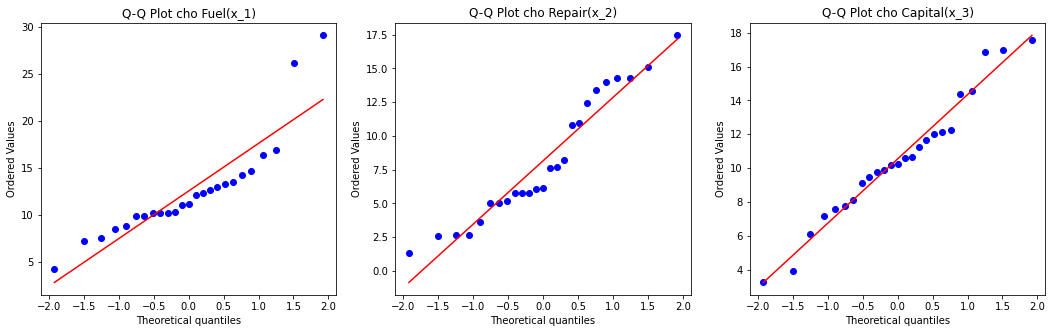

In [30]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

qq_1 = stats.probplot(data_513['Fuel(x_1)'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot cho Fuel(x_1)')

qq_2 = stats.probplot(data_513['Repair(x_2)'], dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot cho Repair(x_2)')

qq_3 = stats.probplot(data_513['Capital(x_3)'], dist=stats.norm, plot=axs[2])
axs[2].set_title('Q-Q Plot cho Capital(x_3)')

plt.show()

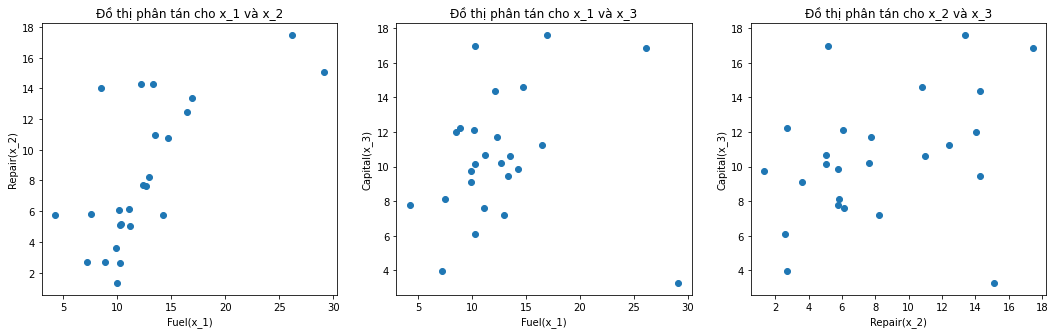

In [31]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].scatter(data_513['Fuel(x_1)'], data_513['Repair(x_2)'])
ax[0].set(xlabel='Fuel(x_1)', ylabel='Repair(x_2)')
ax[0].set_title('Đồ thị phân tán cho x_1 và x_2')

ax[1].scatter(data_513['Fuel(x_1)'], data_513['Capital(x_3)'])
ax[1].set(xlabel='Fuel(x_1)', ylabel='Capital(x_3)')
ax[1].set_title('Đồ thị phân tán cho x_1 và x_3')

ax[2].scatter(data_513['Repair(x_2)'], data_513['Capital(x_3)'])
ax[2].set(xlabel='Repair(x_2)', ylabel='Capital(x_3)')
ax[2].set_title('Đồ thị phân tán cho x_2 và x_3')

plt.show()

Các điểm ngoại lai trên đồ thị có thể nhìn ra dễ dàng. Chúng ta sẽ loại bỏ 2 điểm ngoại lai là $(29.11,15.09,3.28), (26.16,17.44,16.89)$

In [32]:
data_513_new=data_513.copy()
data_513_without_outlier=data_513_new.drop([8,20],axis=0)
print(data_513_without_outlier)

    Fuel(x_1)  Repair(x_2)  Capital(x_3)
0       16.44        12.43         11.23
1        7.19         2.70          3.92
2        9.92         1.35          9.75
3        4.24         5.78          7.78
4       11.20         5.05         10.67
5       14.25         5.78          9.88
6       13.50        10.98         10.60
7       13.32        14.27          9.45
9       12.68         7.61         10.23
10       7.51         5.80          8.13
11       9.90         3.63          9.13
12      10.25         5.07         10.17
13      11.11         6.15          7.61
14      12.17        14.26         14.39
15      10.24         2.59          6.09
16      10.18         6.05         12.14
17       8.88         2.70         12.23
18      12.34         7.73         11.68
19       8.51        14.02         12.01
21      12.95         8.24          7.18
22      16.93        13.37         17.59
23      14.70        10.78         14.58
24      10.32         5.16         17.00


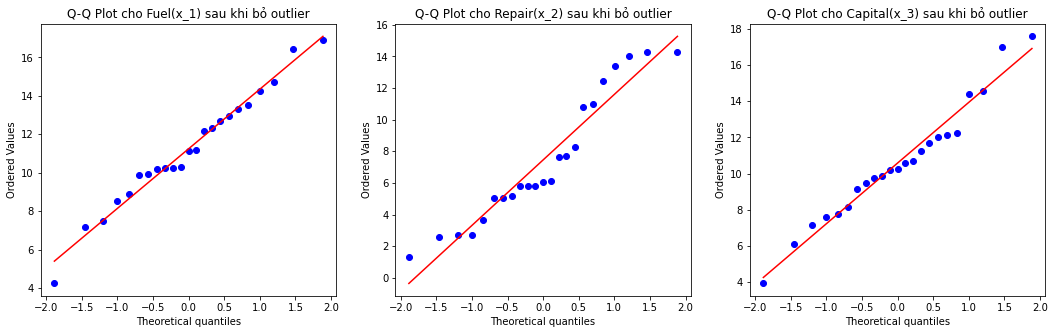

In [33]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

qq_1 = stats.probplot(data_513_without_outlier['Fuel(x_1)'], dist=stats.norm, plot=axs[0])
axs[0].set_title('Q-Q Plot cho Fuel(x_1) sau khi bỏ outlier')

qq_2 = stats.probplot(data_513_without_outlier['Repair(x_2)'], dist=stats.norm, plot=axs[1])
axs[1].set_title('Q-Q Plot cho Repair(x_2) sau khi bỏ outlier')

qq_3 = stats.probplot(data_513_without_outlier['Capital(x_3)'], dist=stats.norm, plot=axs[2])
axs[2].set_title('Q-Q Plot cho Capital(x_3) sau khi bỏ outlier')

plt.show()

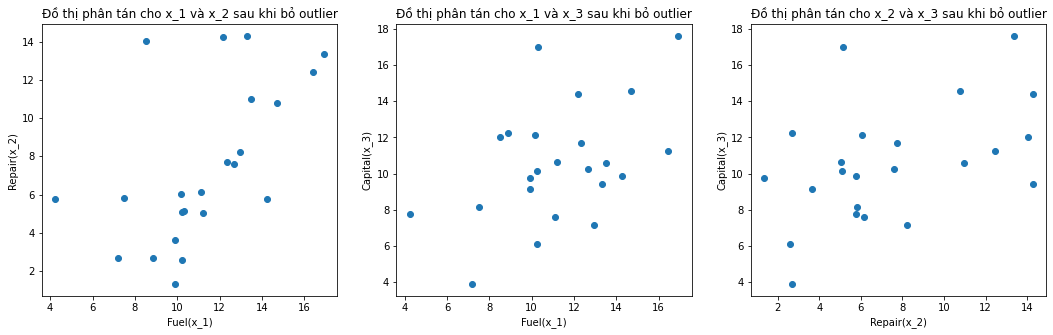

In [34]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].scatter(data_513_without_outlier['Fuel(x_1)'], data_513_without_outlier['Repair(x_2)'])
ax[0].set(xlabel='Fuel(x_1)', ylabel='Repair(x_2)')
ax[0].set_title('Đồ thị phân tán cho x_1 và x_2 sau khi bỏ outlier')

ax[1].scatter(data_513_without_outlier['Fuel(x_1)'], data_513_without_outlier['Capital(x_3)'])
ax[1].set(xlabel='Fuel(x_1)', ylabel='Capital(x_3)')
ax[1].set_title('Đồ thị phân tán cho x_1 và x_3 sau khi bỏ outlier')

ax[2].scatter(data_513_without_outlier['Repair(x_2)'], data_513_without_outlier['Capital(x_3)'])
ax[2].set(xlabel='Repair(x_2)', ylabel='Capital(x_3)')
ax[2].set_title('Đồ thị phân tán cho x_2 và x_3 sau khi bỏ outlier')

plt.show()

Sau khi loại bỏ điểm ngoại lai, bộ dữ liệu trông tuân theo phân phối chuẩn hơn. Ví dụ như đồ thị Q-Q plot, các điểm dữ liệu fit đường tuyến tính hơn là khi có điểm ngoại lai.

**b) Xây dựng khoảng Bonferroni 95% cho từng trung bình giá tiền riêng lẻ. Hơn nữa, hãy xây dựng khoảng $T^2$ 95%. So sánh hai khoảng trên.**

In [35]:
x_mean = data_513.mean(axis=0)
S = np.cov(data_513.T)
print(">> Vectơ trung bình mẫu: \n", np.array(x_mean))
print("\n>> Ma trận hiệp phương sai mẫu: \n", S)

alpha = 0.05
f_513 = stats.f.ppf(q=1-alpha, dfn=p_513, dfd=n_513-p_513)
F_513 = (p_513*(n_513-1)/(n_513-p_513))*f_513
print('\n>> Giá trị tới hạn là: \n',F_513)

>> Vectơ trung bình mẫu: 
 [12.56    8.1612 10.5444]

>> Ma trận hiệp phương sai mẫu: 
 [[28.965925   17.21535833  2.69456667]
 [17.21535833 21.45285267  6.04452783]
 [ 2.69456667  6.04452783 13.59904233]]

>> Giá trị tới hạn là: 
 9.97895450831698


Với độ tin cậy 95%, ta có giá trị
<center> $\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)$ <center>
    
Từ đây, ta xây dựng được khoảng tin cậy 95% cho từng giá trị $\mu_1,\mu_2,\mu_3$ như sau
    
<center> $\overline{x}_1-\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{11}}{n}}\leq\mu_1\leq\overline{x}_1+\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{11}}{n}}$ <center>

<center> $\overline{x}_2-\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{22}}{n}}\leq\mu_2\leq\overline{x}_2+\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{22}}{n}}$ <center>

<center> $\overline{x}_3-\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{33}}{n}}\leq\mu_3\leq\overline{x}_3+\sqrt{\dfrac{p(n-1)}{n-p}F_{p,n-p}(\alpha)}\sqrt{\dfrac{s_{33}}{n}}$ <center>

In [36]:
lcb = lambda i: x_mean[i] - np.sqrt(F_513)*np.sqrt(S[i][i]/n_513)
ucb = lambda i: x_mean[i] + np.sqrt(F_513)*np.sqrt(S[i][i]/n_513)

print("\n>> Khoảng T^2 95% cho trung bình: \n")
IC = []
for i in range(p_513):
    ic = [lcb(i), ucb(i)]
    print(">> {}:\t{}\n".format(data_513.columns[i], ic))
    IC.append(ic)


>> Khoảng T^2 95% cho trung bình: 

>> Fuel(x_1):	[9.159707966269242, 15.96029203373076]

>> Repair(x_2):	[5.234925639422761, 11.087474360577241]

>> Capital(x_3):	[8.214556873941852, 12.87424312605815]



Với độ tin cậy 95%, ta xây dựng được khoảng tin cậy Bonferroni 95% cho từng giá trị $\mu_1, \mu_2, \mu_3$ như sau
    
<center> $\overline{x}_1-t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{11}}{n}}\leq\mu_1\leq\overline{x}_1+t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{11}}{n}}$ <center>
    
<center> $\overline{x}_2-t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{22}}{n}}\leq\mu_2\leq\overline{x}_2+t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{22}}{n}}$ <center>

<center> $\overline{x}_3-t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{33}}{n}}\leq\mu_3\leq\overline{x}_3+t_{n-1}\left(\dfrac{\alpha}{2p}\right)\sqrt{\dfrac{s_{33}}{n}}$ <center>

In [37]:
t_513 = stats.t.ppf(1-(alpha/(2*p_513)), n_513-1)

lcb_bonfer = lambda i: x_mean[i] - t_513*np.sqrt(S[i][i]/n_513)
ucb_bonfer = lambda i: x_mean[i] + t_513*np.sqrt(S[i][i]/n_513)

print("Khoảng tin cậy 95% Bonferroni: \n")

IC_bonfer = []
for i in range(p_513):
    ic = [lcb_bonfer(i), ucb_bonfer(i)]
    print(">> {}:\t{}\n".format(data_513.columns[i], ic))
    IC_bonfer.append(ic)

Khoảng tin cậy 95% Bonferroni: 

>> Fuel(x_1):	[9.789732761438135, 15.330267238561866]

>> Repair(x_2):	[5.777121835026541, 10.54527816497346]

>> Capital(x_3):	[8.646243012576223, 12.44255698742378]



Ta nhận thấy khoảng $T^2$ rộng hơn khoảng Bonferroni với cùng độ tin cậy.

### 5.23
**Xét 30 quan trắc trên sọ nam giới người Ai Cập ở giai đoạn thứ 1 được cho ở bảng 6.13 trang 349.**

In [38]:
path_23 = 'E5-23.txt'
data_23 = pd.read_table(path_23, delim_whitespace=True).drop(['x5'],axis=1)
data_23_columns = ['MaxBreath', 'BasHeight', 'BasLength', 'NasHeight']
n_23, p_23 = data_23.shape
print(data_23.head(10))
print(">> Shape of data: ",data_23.shape)

    x1   x2   x3  x4
0  131  138   89  49
1  125  131   92  48
2  131  132   99  50
3  119  132   96  44
4  136  143  100  54
5  138  137   89  56
6  139  130  108  48
7  125  136   93  48
8  131  134  102  51
9  134  134   99  51
>> Shape of data:  (30, 4)


**(a) Xây dựng biểu đồ Q-Q cho phân phối biên của các biến *maxbreath* ($\textbf{x}_1$), *basheight* ($\textbf{x}_2$), *baslength* ($\textbf{x}_3$) và *nasheight* ($\textbf{x}_4$). Ngoài ra, xây dựng biểu đồ chi-square của các quan trắc nhiều chiều. Dữ liệu có tuân theo phân phối chuẩn không?** 

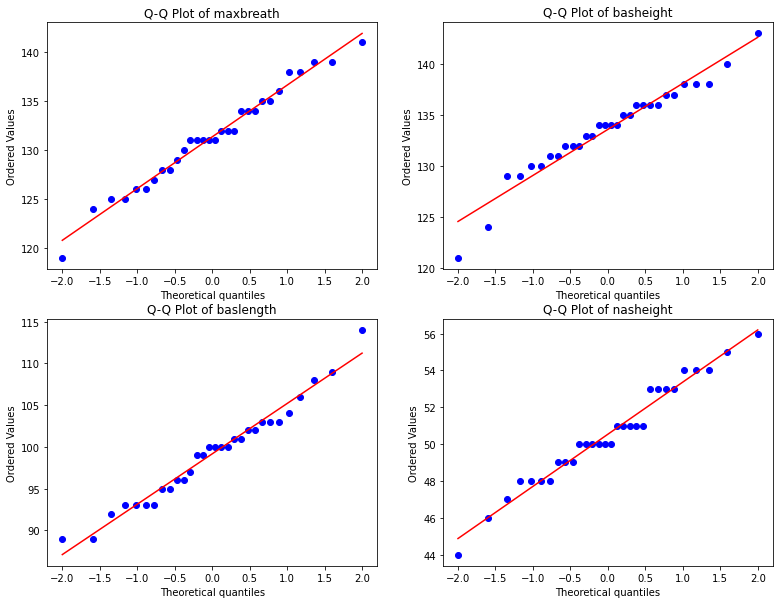

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(13,10))

prob_1 = stats.probplot(data_23['x1'], dist=stats.norm, plot=axs[0][0])
axs[0][0].set_title('Q-Q Plot of maxbreath')

prob_2 = stats.probplot(data_23['x2'], dist=stats.norm, plot=axs[0][1])
axs[0][1].set_title('Q-Q Plot of basheight')

prob_3 = stats.probplot(data_23['x3'], dist=stats.norm, plot=axs[1][0])
axs[1][0].set_title('Q-Q Plot of baslength')

prob_4 = stats.probplot(data_23['x4'], dist=stats.norm, plot=axs[1][1])
axs[1][1].set_title('Q-Q Plot of nasheight')

plt.show()

In [40]:
# Tính mean và covariance từ dữ liệu
x_mean = data_23.mean()
S = np.cov(data_23.T)

# Tính squared statistical distances
sq_stat_dists = np.array([np.dot(np.dot(np.transpose(data_23.iloc[i]-x_mean),np.linalg.inv(S)),data_23.iloc[i]-x_mean) for i in range(n_23)])
sq_stat_dists_sorted = np.sort(sq_stat_dists)

chisqs = np.array([stats.chi2.ppf(((i+1)-1/2)/n_23, p_23) for i in range(n_23)])

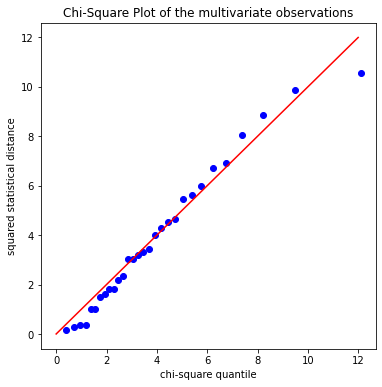

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=chisqs, y=sq_stat_dists_sorted, color='blue')
ax.set_title('Chi-Square Plot of the multivariate observations')
ax.set(xlabel='chi-square quantile', ylabel='squared statistical distance')

x = np.array(range(0,13))
ax.plot(x,x,'red')

plt.show()

Dữ liệu trên có vẻ có phân phối chuẩn nhiều chiều vì các điểm biễu diễn trong các đồ thị Q-Q và chi-square có xu hướng nằm trên một đường tuyến tính.

**(b) Xây dựng khoảng tin cậy Bonferroni 95% cho từng biến kích thước hộp sọ. Ngoài ra, tìm khoảng tin cậy $T^2$ 95%. So sánh hai tập các khoảng tin cậy ở trên.**

In [42]:
alpha = 0.05
f = stats.f.ppf(q=1-alpha, dfn=p_23, dfd=n_23-p_23)
F = (p_23*(n_23-1)/(n_23-p_23))*f

lcb = lambda i: x_mean[i] - np.sqrt(F)*np.sqrt(S[i][i]/n_23)
ucb = lambda i: x_mean[i] + np.sqrt(F)*np.sqrt(S[i][i]/n_23)

# 95% simultaneous confidence intervals for individual means
print("95% $T^2$-intervals for \n")
IC = []
for i in range(p_23):
    ic = [lcb(i), ucb(i)]
    print(">> {}:\t{}\n".format(data_23_columns[i], ic))
    IC.append(ic)

95% $T^2$-intervals for 

>> MaxBreath:	[128.09087519299922, 134.64245814033413]

>> BasHeight:	[130.74584376446998, 136.45415623553]

>> BasLength:	[95.40858367690767, 102.92474965642567]

>> NasHeight:	[48.76844330030946, 52.298223366357206]



In [43]:
t = stats.t.ppf(1-(alpha/(2*p_23)), n_23-1)

lcb_bonfer = lambda i: x_mean[i] - t*np.sqrt(S[i][i]/n_23)
ucb_bonfer = lambda i: x_mean[i] + t*np.sqrt(S[i][i]/n_23)

# 95% Bonferroni simultaneous confidence intervals for individual means
print("95% Bonferroni intervals for \n")

IC_bonfer = []
for i in range(p_23):
    ic = [lcb_bonfer(i), ucb_bonfer(i)]
    print(">> {}:\t{}\n".format(data_23_columns[i], ic))
    IC_bonfer.append(ic)

95% Bonferroni intervals for 

>> MaxBreath:	[128.87266786467237, 133.86066546866098]

>> BasHeight:	[131.42700996405392, 135.77299003594607]

>> BasLength:	[96.30547890499241, 102.02785442834093]

>> NasHeight:	[49.189647795534015, 51.87701887113265]



Từ các khoảng tin cậy ở trên ta thấy rằng, với độ tin cậy 95%, trên cùng một đặc trưng thì khoảng tin cậy Bonferroni nhỏ hơn khoảng tin cậy $T^2$.

### 5.24
**Sử dụng dữ liệu *Madison*, *Wisconsin*, *Police Department* cho ở bảng 5.8, xây dựng biểu đồ $\overline{X}$ cho từng $x_3$ = holdover hours và $x_4$ = COA hours. Các đặc điểm quá trình riêng lẻ này có được kiểm soát không?**

In [44]:
path_24 = 'T5-8.txt'
data_24 = pd.read_table(path_24, delim_whitespace=True)[['x3', 'x4']]
n_24, p_24 = data_24.shape
print(data_24.head())
print(">> Shape of data: ",data_24.shape)

     x3     x4
0  1181  14861
1  3532  11367
2  2502  13329
3  4510  12328
4  3032  12847
>> Shape of data:  (16, 2)


In [45]:
# Tính mean và covariance từ dữ liệu
x_mean = data_24.mean()
S = np.cov(data_24.T)
print(">> Vectơ trung bình mẫu: \n", np.array(x_mean))
print("\n>> Ma trận hiệp phương sai mẫu: \n", S)

>> Vectơ trung bình mẫu: 
 [ 2676.875 13563.625]

>> Ma trận hiệp phương sai mẫu: 
 [[ 1458543.05       -1113809.78333333]
 [-1113809.78333333  1698324.38333333]]


x3 = holdover hours
>> Giới hạn trên (UCL) =  6299.979670030939
>> Giới hạn trên (LCL) =  -946.2296700309389

x4 = COA hours
>> Giới hạn trên (UCL) =  17473.218258895355
>> Giới hạn trên (LCL) =  9654.031741104645


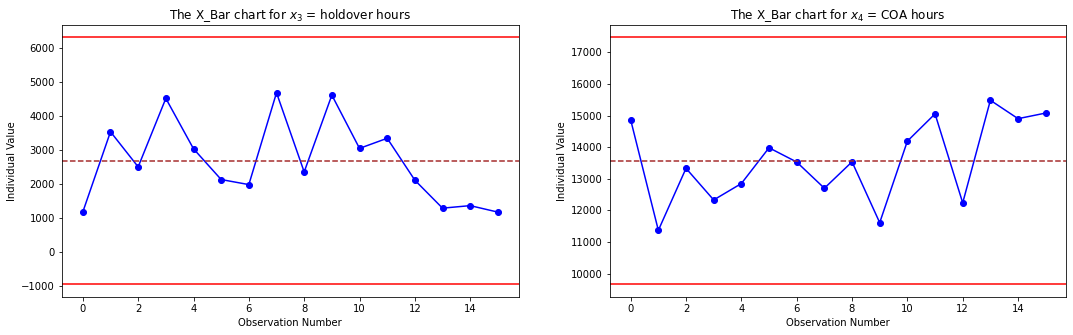

In [46]:
UCL = lambda i: x_mean[i] + 3*np.sqrt(S[i][i])
LCL = lambda i: x_mean[i] - 3*np.sqrt(S[i][i])

print("x3 = holdover hours")
print(">> Giới hạn trên (UCL) = ", UCL(0))
print(">> Giới hạn trên (LCL) = ", LCL(0))

print("\nx4 = COA hours")
print(">> Giới hạn trên (UCL) = ", UCL(1))
print(">> Giới hạn trên (LCL) = ", LCL(1))

fig, axs = plt.subplots(1,2,figsize=(18,5))

for i in range(p_24):
    axs[i].plot(data_24[data_24.columns[i]], linestyle='-', marker='o', color='blue')
    axs[i].axhline(UCL(i), color='red', linestyle='-')
    axs[i].axhline(LCL(i), color='red', linestyle='-')
    axs[i].axhline(x_mean[i], color='brown', linestyle='dashed')
    axs[i].set(xlabel='Observation Number', ylabel='Individual Value')

axs[0].set_title('The X_Bar chart for $x_3$ = holdover hours')
axs[1].set_title('The X_Bar chart for $x_4$ = COA hours')

plt.show()

Từ biểu đồ $\overline{X}$ ở trên, ta thấy rằng cả hai đặc trưng holdover hours và COA hours đều ổn định và nằm trong tầm kiểm soát.

### 5.25
**Sử dụng lại bộ dữ liệu ở bài 5.24 để xây dựng hình quality ellipse và biểu đồ $T^2$. Các biến hai chiều trên có nằm trong tầm kiểm soát không? Bạn học được gì từ biểu đồ quản lý nhiều chiều không biểu kiến trong biểu đồ $\overline{X}$.** 

In [47]:
path_25 = 'T5-8.txt'
data_25 = pd.read_table(path_25, delim_whitespace=True)[['x3', 'x4']]
n_25, p_25 = data_25.shape
print(data_25.head())
print(">> Shape of data: ",data_25.shape)

     x3     x4
0  1181  14861
1  3532  11367
2  2502  13329
3  4510  12328
4  3032  12847
>> Shape of data:  (16, 2)


In [48]:
# Tính mean và covariance từ dữ liệu
x_mean = data_24.mean()
S = np.cov(data_24.T)
print(">> Vectơ trung bình mẫu: \n", np.array(x_mean))
print("\n>> Ma trận hiệp phương sai mẫu: \n", S)

>> Vectơ trung bình mẫu: 
 [ 2676.875 13563.625]

>> Ma trận hiệp phương sai mẫu: 
 [[ 1458543.05       -1113809.78333333]
 [-1113809.78333333  1698324.38333333]]


Với mức ý nghĩa $\alpha=0.05$ ta minh hoạ hình quality ellipse bằng hình 95% confidence ellipse chứa tất cả các điểm **x** thoả mãn
<center> $(\textbf{x}-\overline{\textbf{x}})^T\textbf{S}^{-1}(\textbf{x}-\overline{\textbf{x}}) \leq \chi_p^2(0.05)$ <center>

Text(0.5, 1.0, 'The quality control 95% ellipse for holdover and COA hours')

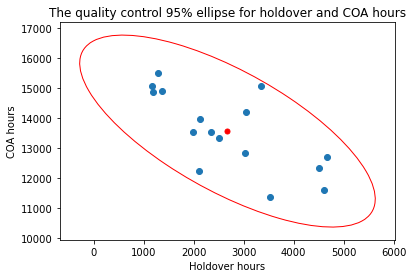

In [49]:
alpha = 0.05
chisq = stats.chi2.ppf(1-alpha, p_25)

fig, ax = plt.subplots()

e = get_cov_ellipse(S, x_mean, np.sqrt(chisq), edgecolor='red', facecolor='None')
ax.scatter(x_mean[0], x_mean[1], c='red', s=25)
ax.scatter(data_25['x3'], data_25['x4'])
ax.add_patch(e)
ax.set(xlabel='Holdover hours', ylabel='COA hours')
ax.set_title("The quality control 95% ellipse for holdover and COA hours")

Với mức ý nghĩa $\alpha=0.05$, tại điểm thứ *j* của dữ liệu, ta tính được giá trị thống kê $T^2$ như sau
<center> $T_j^2 = (\textbf{x}_j-\overline{\textbf{x}})^T\textbf{S}^{-1}(\textbf{x}_j-\overline{\textbf{x}})$ <center>

Hơn nữa, ta có giới hạn quản lý dưới (lower control limit) là 0 và giới hạn quản lí trên (upper control limit) là
    <center> $UCL = \chi_p^2(0.05)$ <center>

>> The upper control 95% limit (UCL):  5.991464547107979
>> The lower control 95% limit (LCL):  0


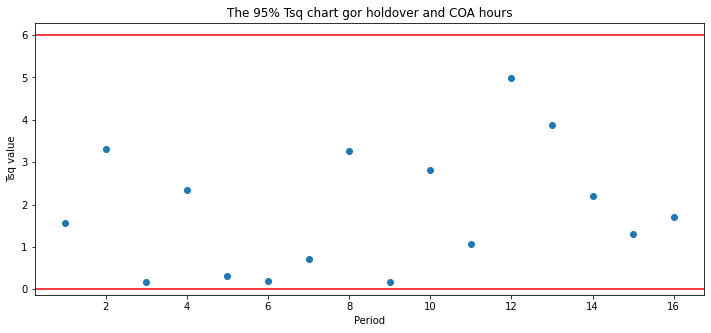

In [50]:
Tsq = np.array([np.dot(np.dot(np.transpose(data_25.iloc[i]-x_mean),np.linalg.inv(S)),data_25.iloc[i]-x_mean) for i in range(n_25)])

alpha = 0.05
UCL = stats.chi2.ppf(1-alpha, p_25)
LCL = 0
print(">> The upper control 95% limit (UCL): ", UCL)
print(">> The lower control 95% limit (LCL): ", LCL)
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(np.arange(1, n_25+1), Tsq)
ax.axhline(UCL, color='red', linestyle='-')
ax.axhline(LCL, color='red', linestyle='-')
ax.set_title('The 95% Tsq chart gor holdover and COA hours')
ax.set(xlabel='Period', ylabel='Tsq value')

plt.show()

Ta nhận thấy rằng, tất cả các điểm dữ liệu đều nằm trong tầm kiểm soát khi tất cả các điểm đều nằm trong hình 95% quality ellipse và các giá trị thống kê $T^2$ của các điểm đều nằm trong vùng giới hạn 95%.

### 5.28
**Là một phần của một nghiên cứu về quá trình dây chuyền làm các thanh sắt, một nhà máy sản xuất xe hơi sử dụng các sensor để ghi lại độ lệch của độ dày (milimét) 6 điểm khác nhau trên 1 chiếc xe hơi. 4 thông số đầu tiên được đo khi thân xe đã hoàn thành và 2 thông số cuối được đo khi phần thân dưới đang trong các giai đoạn dây chuyền trước đó. Dữ liệu của 50 chiếc xe được cho bởi bảng 5.14**

In [51]:
print('Exercise 5.28: ')
print('a)')
path_514 = 'T5-14.txt'
data_514 = pd.read_table(path_514, delim_whitespace=True)
# data_514.columns=['x_1','x_2','x_3','x_4','x_5','x_6']
print(data_514.head(10))
print(data_514.shape)
n_514,p_514=data_514.shape

Exercise 5.28: 
a)
     x1    x2    x3    x4    x5    x6
0 -0.12  0.36  0.40  0.25  1.37 -0.13
1 -0.60 -0.35  0.04 -0.28 -0.25 -0.15
2 -0.13  0.05  0.84  0.61  1.45  0.25
3 -0.46 -0.37  0.30  0.00 -0.12 -0.25
4 -0.46 -0.24  0.37  0.13  0.78 -0.15
5 -0.46 -0.16  0.07  0.10  1.15 -0.18
6 -0.46 -0.24  0.13  0.02  0.26 -0.20
7 -0.13  0.05 -0.01  0.09 -0.15 -0.18
8 -0.31 -0.16 -0.20  0.23  0.65  0.15
9 -0.37 -0.24  0.37  0.21  1.15  0.05
(50, 6)


**a) Quá trình sản xuất có vẻ ổn định ở 30 trường hợp đầu. Sử dụng những trường hợp này để ước lượng $S, \overline{x}$. Sau đó xây dựng biểu đổ $T^2$ sử dụng tất cả các biến bao gồm tất cả 50 trường hợp.**

In [52]:
data_514_first=data_514.copy().loc[:29,:]
print(data_514_first)
x_mean=np.mean(data_514_first)
print('>> Trung bình ước lượng bởi 30 trường hợp đầu là: \n',np.array(x_mean))

S=np.cov(data_514_first.T)
print('\n>> Phương sai mẫu ước lượng bởi 30 trường hợp đầu là: \n', S)

      x1    x2    x3    x4    x5    x6
0  -0.12  0.36  0.40  0.25  1.37 -0.13
1  -0.60 -0.35  0.04 -0.28 -0.25 -0.15
2  -0.13  0.05  0.84  0.61  1.45  0.25
3  -0.46 -0.37  0.30  0.00 -0.12 -0.25
4  -0.46 -0.24  0.37  0.13  0.78 -0.15
5  -0.46 -0.16  0.07  0.10  1.15 -0.18
6  -0.46 -0.24  0.13  0.02  0.26 -0.20
7  -0.13  0.05 -0.01  0.09 -0.15 -0.18
8  -0.31 -0.16 -0.20  0.23  0.65  0.15
9  -0.37 -0.24  0.37  0.21  1.15  0.05
10 -1.08 -0.83 -0.81  0.05  0.21  0.00
11 -0.42 -0.30  0.37 -0.58  0.00 -0.45
12 -0.31  0.10 -0.24  0.24  0.65  0.35
13 -0.14  0.06  0.18 -0.50  1.25  0.05
14 -0.61 -0.35 -0.24  0.75  0.15 -0.20
15 -0.61 -0.30 -0.20 -0.21 -0.50 -0.25
16 -0.84 -0.35 -0.14 -0.22  1.65 -0.05
17 -0.96 -0.85  0.19 -0.18  1.00 -0.08
18 -0.90 -0.34 -0.78 -0.15  0.25  0.25
19 -0.46  0.36  0.24 -0.58  0.15  0.25
20 -0.90 -0.59  0.13  0.13  0.60 -0.08
21 -0.61 -0.50 -0.34 -0.58  0.95 -0.08
22 -0.61 -0.20 -0.58 -0.20  1.10  0.00
23 -0.46 -0.30 -0.10 -0.10  0.75 -0.10
24 -0.60 -0.35 -0.45  0.3

Đồ thị $T^2$ cho tất cả các biến của toàn bộ 50 trường hợp

>> The upper control 95% limit (UCL):  12.591587243743977
>> The lower control 95% limit (LCL):  0


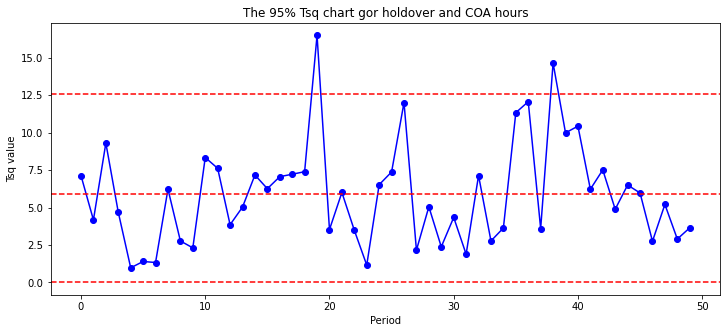

In [53]:
x_mean = data_514.mean()
S=np.cov(data_514.T)
Tsq = np.array([np.dot(np.dot(np.transpose(data_514.iloc[i]-x_mean), np.linalg.inv(S)), data_514.iloc[i]-x_mean) for i in range(n_514)])

alpha = 0.05
UCL = stats.chi2.ppf(1-alpha, p_514)
# f = stats.f.ppf(q=1-alpha, dfn=p_514, dfd=n_514-p_514)
# F = (p_514*(n_514-1)/(n_514-p_514))*f
# UCL = F
LCL = 0
print(">> The upper control 95% limit (UCL): ", UCL)
print(">> The lower control 95% limit (LCL): ", LCL)
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(Tsq, linestyle='-', color='blue', marker='o')
ax.axhline(UCL, color='red', linestyle='--')
ax.axhline(LCL, color='red', linestyle='--')
ax.axhline(Tsq.mean(), color='red', linestyle='--')
ax.set_title('The 95% Tsq chart gor holdover and COA hours')
ax.set(xlabel='Period', ylabel='Tsq value')

plt.show()

**b) Các địa điểm riêng lẻ nào có vẻ như cần xem xét ?**

Các quan trắc nhiều chiều 20, 39 cần phải xem xét. Vì quan trắc 20, 39 lớn hơn giới hạn kiểm soát trên.